# Insights from Music: Spotify Data Visualization & Analysis
#### Andy Xu, Rohan Desai
#### December 5, 2023

Music, as a form of creative expression, is a reflection of ourselves— as individuals and as a society. What insights can we extract from the music that we listen to? In this project, we seek to visualize and analyze music data from Spotify to gather insights from our listening habits.

## Introduction to Datasets Used

We used multiple Spotify datasets in this project, along with external datasets. Each of these datasets had their different strengths and weaknesses, leading us to be intentional in our choice of dataset to extract different insights.


For example, we used the following dataset from Spotify for our temporal analysis:
https://drive.google.com/file/d/1LWZ914I0s9Ou2j0XA7brANMK3fnhWz2T/view 

Although this dataset only contained data on less than 1,000 songs, it was valuable for temporal analysis as each song contained time-based fields, such as release year, day, and month.


We also used a US GDP Growth Rate dataset in order to correlate music to economic factors. This dataset was fairly straightforward, recording the annual percent change in the US GDP from 1961 to 2022. The economic dataset is linked here: https://www.macrotrends.net/countries/USA/united-states/gdp-growth-rate1

## Temporal Dataset Analysis

### Loading the Data

We have the temporal analysis dataset loaded in a local file named "Spotify2023.csv". We before beginning our analysis, we must import our used libraries, and load this data into a pandas dataframe.

We noticed that this dataset had non-numeric values in the "streams" column. Since this was difficult to work with, we parsed the dataset by dropping any rows that had a non-numeric streams value, then converted values in the streams column into integers.

In [2]:
# importing used libraries
import pandas
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
# import our data from our csv file into a dataframe
df = pandas.read_csv("Spotify2023.csv",  encoding='latin-1')
# filter out any non-numeric values and drop them as a row
df = df[df["streams"].apply(lambda x: x.isnumeric())]
# make streams column values into ints
df["streams"] = df["streams"].astype(int)
print(df)

                              track_name      artist(s)_name  artist_count  \
0    Seven (feat. Latto) (Explicit Ver.)    Latto, Jung Kook             2   
1                                   LALA         Myke Towers             1   
2                                vampire      Olivia Rodrigo             1   
3                           Cruel Summer        Taylor Swift             1   
4                         WHERE SHE GOES           Bad Bunny             1   
..                                   ...                 ...           ...   
948                         My Mind & Me        Selena Gomez             1   
949            Bigger Than The Whole Sky        Taylor Swift             1   
950                 A Veces (feat. Feid)  Feid, Paulo Londra             2   
951                        En La De Ella  Feid, Sech, Jhayco             3   
952                                Alone           Burna Boy             1   

     released_year  released_month  released_day  in_spotify_pl

### Music Valence Over Time

The "valence" of a song is, generally speaking, its "positivity"— with a higher valence value indicating the song as being more positive. In order to analyze the "positivity" of music over time, we calculated the average valence value of all songs in the dataset released in each year.

In order to remove outliers, years in the dataset that had less than 2 songs released were excluded from the dataset, as one song is not a good indicator of all music from that year.

Next, we created a scatterplot with a linear regression of the mean valence versus release year.

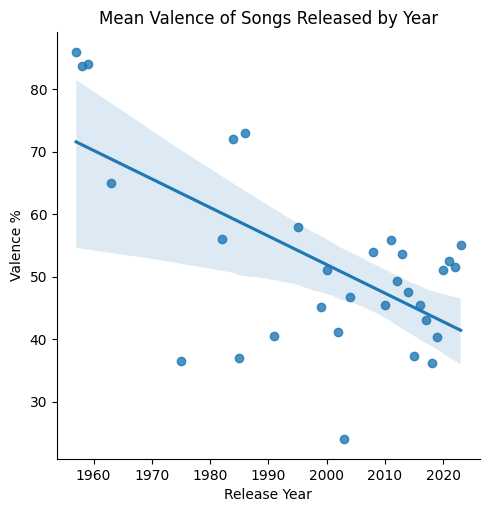

In [13]:
# group song by released year but remove any years that have less than 2 songs
meanValences = df.groupby('released_year').filter(lambda x: len(x) >= 2)

#get the mean of the valence for each year
meanValences = meanValences.groupby('released_year')['valence_%'].mean().reset_index()
meanValences['released_year'] = meanValences['released_year'].astype(int)

#create a scatterlot between mean valence and release year
plot = sns.lmplot(data=meanValences, x="released_year", y="valence_%")
plt.title("Mean Valence of Songs Released by Year")

#create a linear regression for the scatterplot
plot.set(xlabel='Release Year', ylabel='Valence %')

Based on the negative slope of the linear regression, we can see that the average positivity of the music we listen to generally decreases over time.